# Analise de dados sobre o arquivo de produção intelectual da Pós-graduação dos dados abertos da CAPES do ano de 2017 a 2019

In [1]:
# Importando bibliotecas
import os
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
# Obtendo caminho para pasta base do projeto
base_folder = os.getcwd()

# Caminho arquivo
path = os.path.join(base_folder,'2017_a_2019_Produção_Intelectual_de_Pós_Graduação_stricto_sensu_no_Brasil.csv')

In [2]:
# Lendo arquivo
df = pd.read_csv(path, sep=";", low_memory=False, encoding = "ISO-8859-1")
df.head()

,codigo_programa,nome_programa,sigla_ies,nome_ies,ano_base,id_add_producao_intelectual,id_producao_intelectual,titulo_tese,id_tipo_producao,nome_tipo_producao,id_subtipo_producao,nome_subtipo_producao,id_formulario_producao,nome_formulario,id_area_concentracao,nome_area_concentracao,id_linha_pesquisa,linha_pesquisa,id_projeto,nome_projeto,dh_inicio_area_conc,dh_fim_area_conc,dh_inicio_linha,dh_fim_linha,indicador_glosa
0,32018010041P5,"INTERDISCIPLINAR EM ARTES, URBANIDADES E SUSTE...",UFSJ,UNIVERSIDADE FEDERAL DE SÃ¯Â¿Â½O JOÃ¯Â¿Â½O DEL...,2017,22828990,5722057,GAIA: VIVENCIAS ECOPOÃ¯Â¿Â½TICAS PARA UMA ODIS...,1,ARTÃ¯Â¿Â½STICA,18,ARTES CÃ¯Â¿Â½NICAS,24,ARTISTICA - ARTES CÃ¯Â¿Â½NICAS,85633.0,POÃ¯Â¿Â½TICAS ARTÃ¯Â¿Â½STICAS E SOCIOCULTURAIS...,110318.0,PROCESSOS CRIATIVOS,422474.0,LABORATÃ¯Â¿Â½RIO DE ECOPOÃ¯Â¿Â½TICAS - ECOLAB,08AUG2016:00:00:00.000000,NaN,09AUG2016:00:00:00.000000,NaN,0
1,41001010013P4,LITERATURA,UFSC,UNIVERSIDADE FEDERAL DE SANTA CATARINA,2017,23113447,6057073,CLARO!,1,ARTÃ¯Â¿Â½STICA,18,ARTES CÃ¯Â¿Â½NICAS,24,ARTISTICA - ARTES CÃ¯Â¿Â½NICAS,81677.0,LITERATURAS,102394.0,"SUBJETIVIDADE, MEMÃ¯Â¿Â½RIA E HISTÃ¯Â¿Â½RIA",373117.0,"PASSAGENS: BENJAMIN, PARIS, BORGES, BUENOS AIRES",01JAN2013:00:00:00.000000,NaN,01JAN2013:00:00:00.000000,NaN,0
2,42046017010P3,ENSINO DE LÃ¯Â¿Â½NGUAS,UNIPAMPA,FUNDAÃ¯Â¿Â½Ã¯Â¿Â½O UNIVERSIDADE FEDERAL DO PAMPA,2017,23310429,5995810,DECLAMAÃ¯Â¿Â½Ã¯Â¿Â½O DE POESIA NO EVENTO III J...,1,ARTÃ¯Â¿Â½STICA,18,ARTES CÃ¯Â¿Â½NICAS,24,ARTISTICA - ARTES CÃ¯Â¿Â½NICAS,82196.0,LINGUAGEM E DOCÃ¯Â¿Â½NCIA,103734.0,"INTERCULTURALIDADE, DISCURSO E COGNIÃ¯Â¿Â½Ã¯Â¿Â½O",324254.0,DESENHOS PEDAGÃ¯Â¿Â½GICOS NA FRONTEIRA BRASIL/...,06JAN2014:00:00:00.000000,NaN,23JAN2014:00:00:00.000000,NaN,0
3,40006018035P3,ESTUDOS DE LINGUAGENS,UTFPR,UNIVERSIDADE TECNOLÃ¯Â¿Â½GICA FEDERAL DO PARAN...,2017,22793294,5611563,TROIANAS XXI,1,ARTÃ¯Â¿Â½STICA,18,ARTES CÃ¯Â¿Â½NICAS,24,ARTISTICA - ARTES CÃ¯Â¿Â½NICAS,83885.0,LINGUAGEM E TECNOLOGIA,106990.0,"ESTÃ¯Â¿Â½TICAS CONTEMPORÃ¯Â¿Â½NEAS, MODERNIDAD...",369621.0,OBSERVATÃ¯Â¿Â½RIO MIDIÃ¯Â¿Â½TICO: ESTUDOS DE R...,11AUG2015:00:00:00.000000,NaN,18AUG2015:00:00:00.000000,NaN,0
4,22011013002P7,INTERDISCIPLINAR EM HUMANIDADES,UNILAB,UNIVERSIDADE DA INTEGRAÃ¯Â¿Â½Ã¯Â¿Â½O INTERNACI...,2017,23347941,6225795,SANGUE DE PRETO E OUTRAS BATUCADAS,1,ARTÃ¯Â¿Â½STICA,18,ARTES CÃ¯Â¿Â½NICAS,24,ARTISTICA - ARTES CÃ¯Â¿Â½NICAS,84853.0,ESTUDOS INTERDISCIPLINARES EM HUMANIDADES,108861.0,"TRABALHO, DESENVOLVIMENTO E MIGRACOES",NaN,NaN,15FEB2016:00:00:00.000000,NaN,15FEB2016:00:00:00.000000,NaN,0


In [3]:
# Definindo precisão de exibição de dados
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [4]:
# Realizando encoding das colunas
columns = ['nome_programa', 
           'sigla_ies', 
           'nome_ies', 
           'titulo_tese', 
           'nome_tipo_producao', 
           'nome_subtipo_producao', 
           'nome_formulario',
           'nome_area_concentracao',
           'linha_pesquisa',
           'nome_projeto']

for colum in columns:
  df[colum] = [str(nome).encode("ascii", "ignore").decode('utf-8') for nome in df[colum]]
df.head()

,codigo_programa,nome_programa,sigla_ies,nome_ies,ano_base,id_add_producao_intelectual,id_producao_intelectual,titulo_tese,id_tipo_producao,nome_tipo_producao,id_subtipo_producao,nome_subtipo_producao,id_formulario_producao,nome_formulario,id_area_concentracao,nome_area_concentracao,id_linha_pesquisa,linha_pesquisa,id_projeto,nome_projeto,dh_inicio_area_conc,dh_fim_area_conc,dh_inicio_linha,dh_fim_linha,indicador_glosa
0,32018010041P5,"INTERDISCIPLINAR EM ARTES, URBANIDADES E SUSTE...",UFSJ,UNIVERSIDADE FEDERAL DE SO JOO DEL-REI,2017,22828990,5722057,GAIA: VIVENCIAS ECOPOTICAS PARA UMA ODISSEIA N...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,85633.0000,"POTICAS ARTSTICAS E SOCIOCULTURAIS: ESPAO, MEM...",110318.0000,PROCESSOS CRIATIVOS,422474.0000,LABORATRIO DE ECOPOTICAS - ECOLAB,08AUG2016:00:00:00.000000,NaN,09AUG2016:00:00:00.000000,NaN,0
1,41001010013P4,LITERATURA,UFSC,UNIVERSIDADE FEDERAL DE SANTA CATARINA,2017,23113447,6057073,CLARO!,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,81677.0000,LITERATURAS,102394.0000,"SUBJETIVIDADE, MEMRIA E HISTRIA",373117.0000,"PASSAGENS: BENJAMIN, PARIS, BORGES, BUENOS AIRES",01JAN2013:00:00:00.000000,NaN,01JAN2013:00:00:00.000000,NaN,0
2,42046017010P3,ENSINO DE LNGUAS,UNIPAMPA,FUNDAO UNIVERSIDADE FEDERAL DO PAMPA,2017,23310429,5995810,DECLAMAO DE POESIA NO EVENTO III JORNADA DE RE...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,82196.0000,LINGUAGEM E DOCNCIA,103734.0000,"INTERCULTURALIDADE, DISCURSO E COGNIO",324254.0000,DESENHOS PEDAGGICOS NA FRONTEIRA BRASIL/URUGUAI,06JAN2014:00:00:00.000000,NaN,23JAN2014:00:00:00.000000,NaN,0
3,40006018035P3,ESTUDOS DE LINGUAGENS,UTFPR,UNIVERSIDADE TECNOLGICA FEDERAL DO PARAN,2017,22793294,5611563,TROIANAS XXI,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,83885.0000,LINGUAGEM E TECNOLOGIA,106990.0000,"ESTTICAS CONTEMPORNEAS, MODERNIDADE E TECNOLOGIA",369621.0000,"OBSERVATRIO MIDITICO: ESTUDOS DE RECEPO, CIRCU...",11AUG2015:00:00:00.000000,NaN,18AUG2015:00:00:00.000000,NaN,0
4,22011013002P7,INTERDISCIPLINAR EM HUMANIDADES,UNILAB,UNIVERSIDADE DA INTEGRAO INTERNACIONAL DA LUSO...,2017,23347941,6225795,SANGUE DE PRETO E OUTRAS BATUCADAS,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,84853.0000,ESTUDOS INTERDISCIPLINARES EM HUMANIDADES,108861.0000,"TRABALHO, DESENVOLVIMENTO E MIGRACOES",nan,nan,15FEB2016:00:00:00.000000,NaN,15FEB2016:00:00:00.000000,NaN,0


In [5]:
# Capturando tamanho do dataframe
df.shape

(3305117, 25)

In [6]:
# verificando valores nulos 
df.isnull().sum()

codigo_programa                      0
nome_programa                        0
sigla_ies                            0
nome_ies                             0
ano_base                             0
id_add_producao_intelectual          0
id_producao_intelectual              0
titulo_tese                          0
id_tipo_producao                     0
nome_tipo_producao                   0
id_subtipo_producao                  0
nome_subtipo_producao                0
id_formulario_producao               0
nome_formulario                      0
id_area_concentracao            775433
nome_area_concentracao               0
id_linha_pesquisa               939045
linha_pesquisa                       0
id_projeto                     1615211
nome_projeto                         0
dh_inicio_area_conc             782720
dh_fim_area_conc               3277294
dh_inicio_linha                 939045
dh_fim_linha                   3231409
indicador_glosa                      0
dtype: int64

In [7]:
# Apagando valores nulos
df.fillna(0, inplace=True)

In [8]:
# Reverificando valores nulos 
df.isnull().sum()

codigo_programa                0
nome_programa                  0
sigla_ies                      0
nome_ies                       0
ano_base                       0
id_add_producao_intelectual    0
id_producao_intelectual        0
titulo_tese                    0
id_tipo_producao               0
nome_tipo_producao             0
id_subtipo_producao            0
nome_subtipo_producao          0
id_formulario_producao         0
nome_formulario                0
id_area_concentracao           0
nome_area_concentracao         0
id_linha_pesquisa              0
linha_pesquisa                 0
id_projeto                     0
nome_projeto                   0
dh_inicio_area_conc            0
dh_fim_area_conc               0
dh_inicio_linha                0
dh_fim_linha                   0
indicador_glosa                0
dtype: int64

In [9]:
# Capturando colunas em float
df_float = df.select_dtypes(include=['float'])
columns = df_float.columns

In [10]:
# Definindo colunas como int
for colum in columns:
  df[colum] = df[colum].astype('int32')
df.head()

,codigo_programa,nome_programa,sigla_ies,nome_ies,ano_base,id_add_producao_intelectual,id_producao_intelectual,titulo_tese,id_tipo_producao,nome_tipo_producao,id_subtipo_producao,nome_subtipo_producao,id_formulario_producao,nome_formulario,id_area_concentracao,nome_area_concentracao,id_linha_pesquisa,linha_pesquisa,id_projeto,nome_projeto,dh_inicio_area_conc,dh_fim_area_conc,dh_inicio_linha,dh_fim_linha,indicador_glosa
0,32018010041P5,"INTERDISCIPLINAR EM ARTES, URBANIDADES E SUSTE...",UFSJ,UNIVERSIDADE FEDERAL DE SO JOO DEL-REI,2017,22828990,5722057,GAIA: VIVENCIAS ECOPOTICAS PARA UMA ODISSEIA N...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,85633,"POTICAS ARTSTICAS E SOCIOCULTURAIS: ESPAO, MEM...",110318,PROCESSOS CRIATIVOS,422474,LABORATRIO DE ECOPOTICAS - ECOLAB,08AUG2016:00:00:00.000000,0,09AUG2016:00:00:00.000000,0,0
1,41001010013P4,LITERATURA,UFSC,UNIVERSIDADE FEDERAL DE SANTA CATARINA,2017,23113447,6057073,CLARO!,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,81677,LITERATURAS,102394,"SUBJETIVIDADE, MEMRIA E HISTRIA",373117,"PASSAGENS: BENJAMIN, PARIS, BORGES, BUENOS AIRES",01JAN2013:00:00:00.000000,0,01JAN2013:00:00:00.000000,0,0
2,42046017010P3,ENSINO DE LNGUAS,UNIPAMPA,FUNDAO UNIVERSIDADE FEDERAL DO PAMPA,2017,23310429,5995810,DECLAMAO DE POESIA NO EVENTO III JORNADA DE RE...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,82196,LINGUAGEM E DOCNCIA,103734,"INTERCULTURALIDADE, DISCURSO E COGNIO",324254,DESENHOS PEDAGGICOS NA FRONTEIRA BRASIL/URUGUAI,06JAN2014:00:00:00.000000,0,23JAN2014:00:00:00.000000,0,0
3,40006018035P3,ESTUDOS DE LINGUAGENS,UTFPR,UNIVERSIDADE TECNOLGICA FEDERAL DO PARAN,2017,22793294,5611563,TROIANAS XXI,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,83885,LINGUAGEM E TECNOLOGIA,106990,"ESTTICAS CONTEMPORNEAS, MODERNIDADE E TECNOLOGIA",369621,"OBSERVATRIO MIDITICO: ESTUDOS DE RECEPO, CIRCU...",11AUG2015:00:00:00.000000,0,18AUG2015:00:00:00.000000,0,0
4,22011013002P7,INTERDISCIPLINAR EM HUMANIDADES,UNILAB,UNIVERSIDADE DA INTEGRAO INTERNACIONAL DA LUSO...,2017,23347941,6225795,SANGUE DE PRETO E OUTRAS BATUCADAS,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,84853,ESTUDOS INTERDISCIPLINARES EM HUMANIDADES,108861,"TRABALHO, DESENVOLVIMENTO E MIGRACOES",0,nan,15FEB2016:00:00:00.000000,0,15FEB2016:00:00:00.000000,0,0


In [11]:
# Exibindo tipos de dados
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3305117 entries, 0 to 3305116
Data columns (total 25 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   codigo_programa              object
 1   nome_programa                object
 2   sigla_ies                    object
 3   nome_ies                     object
 4   ano_base                     int64 
 5   id_add_producao_intelectual  int64 
 6   id_producao_intelectual      int64 
 7   titulo_tese                  object
 8   id_tipo_producao             int64 
 9   nome_tipo_producao           object
 10  id_subtipo_producao          int64 
 11  nome_subtipo_producao        object
 12  id_formulario_producao       int64 
 13  nome_formulario              object
 14  id_area_concentracao         int32 
 15  nome_area_concentracao       object
 16  id_linha_pesquisa            int32 
 17  linha_pesquisa               object
 18  id_projeto                   int32 
 19  nome_projeto         

In [12]:
# Retornando nomes da colunas
df.columns

Index(['codigo_programa', 'nome_programa', 'sigla_ies', 'nome_ies', 'ano_base',
       'id_add_producao_intelectual', 'id_producao_intelectual', 'titulo_tese',
       'id_tipo_producao', 'nome_tipo_producao', 'id_subtipo_producao',
       'nome_subtipo_producao', 'id_formulario_producao', 'nome_formulario',
       'id_area_concentracao', 'nome_area_concentracao', 'id_linha_pesquisa',
       'linha_pesquisa', 'id_projeto', 'nome_projeto', 'dh_inicio_area_conc',
       'dh_fim_area_conc', 'dh_inicio_linha', 'dh_fim_linha',
       'indicador_glosa'],
      dtype='object')

In [13]:
# Valores do dataFrame
df.values

array([['32018010041P5',
        'INTERDISCIPLINAR EM ARTES, URBANIDADES E SUSTENTABILIDADE',
        'UFSJ', ..., '09AUG2016:00:00:00.000000', 0, 0],
       ['41001010013P4', 'LITERATURA', 'UFSC', ...,
        '01JAN2013:00:00:00.000000', 0, 0],
       ['42046017010P3', 'ENSINO DE LNGUAS', 'UNIPAMPA', ...,
        '23JAN2014:00:00:00.000000', 0, 0],
       ...,
       ['31004016033P2', 'COMUNICAO', 'UERJ', ...,
        '01JAN2012:00:00:00.000000', 0, 0],
       ['31004016039P0', 'ARTES', 'UERJ', ..., 0, 0, 0],
       ['33139016001P3', 'COMUNICAO E PRTICAS DE CONSUMO', 'ESPM', ...,
        '01JAN2013:00:00:00.000000', 0, 0]], dtype=object)

In [14]:
# Retornando todas as informações sobre o primeiro elemento
df.loc[1]

codigo_programa                                                   41001010013P4
nome_programa                                                        LITERATURA
sigla_ies                                                                  UFSC
nome_ies                                 UNIVERSIDADE FEDERAL DE SANTA CATARINA
ano_base                                                                   2017
id_add_producao_intelectual                                            23113447
id_producao_intelectual                                                 6057073
titulo_tese                                                              CLARO!
id_tipo_producao                                                              1
nome_tipo_producao                                                     ARTSTICA
id_subtipo_producao                                                          18
nome_subtipo_producao                                              ARTES CNICAS
id_formulario_producao                  

In [15]:
# retornando o primeiro o decimo e o centesimo elemento
df.loc[[1,10,100]]

,codigo_programa,nome_programa,sigla_ies,nome_ies,ano_base,id_add_producao_intelectual,id_producao_intelectual,titulo_tese,id_tipo_producao,nome_tipo_producao,id_subtipo_producao,nome_subtipo_producao,id_formulario_producao,nome_formulario,id_area_concentracao,nome_area_concentracao,id_linha_pesquisa,linha_pesquisa,id_projeto,nome_projeto,dh_inicio_area_conc,dh_fim_area_conc,dh_inicio_linha,dh_fim_linha,indicador_glosa
1,41001010013P4,LITERATURA,UFSC,UNIVERSIDADE FEDERAL DE SANTA CATARINA,2017,23113447,6057073,CLARO!,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,81677,LITERATURAS,102394,"SUBJETIVIDADE, MEMRIA E HISTRIA",373117,"PASSAGENS: BENJAMIN, PARIS, BORGES, BUENOS AIRES",01JAN2013:00:00:00.000000,0,01JAN2013:00:00:00.000000,0,0
10,24001015051P1,LETRAS,UFPB-JP,UNIVERSIDADE FEDERAL DA PARABA ( JOO PESSOA ),2017,22529050,5676749,PERFORMANCE 'A CIDADE DAS DAMAS',1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,84410,"LITERATURA, CULTURA E TRADUO",119034,ESTUDOS MEDIEVAIS,0,nan,05JAN2015:00:00:00.000000,0,09OCT2017:00:00:00.000000,0,0
100,28001010035P0,ARTES CNICAS,UFBA,UNIVERSIDADE FEDERAL DA BAHIA,2017,23438583,5356720,ESPETCULO-EXPOSIO PROTOCOLO CIDADE: UMA FBULA ...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,76884,ARTES CNICAS,83732,POTICAS E PROCESSOS DA ENCENAO,109816,TRAJETOS CRIATIVOS PROTOCOLO LUNAR E REPERTRIO...,04DEC1997:00:00:00.000000,0,01JAN2012:00:00:00.000000,0,0


In [16]:
# Retornando o nome do programa a sigla da instituicao e o titulo da tese do 1°, 10° e 100°
df.loc[[1,10,100], ['nome_programa','sigla_ies','titulo_tese']]

,nome_programa,sigla_ies,titulo_tese
1,LITERATURA,UFSC,CLARO!
10,LETRAS,UFPB-JP,PERFORMANCE 'A CIDADE DAS DAMAS'
100,ARTES CNICAS,UFBA,ESPETCULO-EXPOSIO PROTOCOLO CIDADE: UMA FBULA ...


In [17]:
# Exibindo os 30 primeiros elementos dois a dois
df.loc[0:30:2]

,codigo_programa,nome_programa,sigla_ies,nome_ies,ano_base,id_add_producao_intelectual,id_producao_intelectual,titulo_tese,id_tipo_producao,nome_tipo_producao,id_subtipo_producao,nome_subtipo_producao,id_formulario_producao,nome_formulario,id_area_concentracao,nome_area_concentracao,id_linha_pesquisa,linha_pesquisa,id_projeto,nome_projeto,dh_inicio_area_conc,dh_fim_area_conc,dh_inicio_linha,dh_fim_linha,indicador_glosa
0,32018010041P5,"INTERDISCIPLINAR EM ARTES, URBANIDADES E SUSTE...",UFSJ,UNIVERSIDADE FEDERAL DE SO JOO DEL-REI,2017,22828990,5722057,GAIA: VIVENCIAS ECOPOTICAS PARA UMA ODISSEIA N...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,85633,"POTICAS ARTSTICAS E SOCIOCULTURAIS: ESPAO, MEM...",110318,PROCESSOS CRIATIVOS,422474,LABORATRIO DE ECOPOTICAS - ECOLAB,08AUG2016:00:00:00.000000,0,09AUG2016:00:00:00.000000,0,0
2,42046017010P3,ENSINO DE LNGUAS,UNIPAMPA,FUNDAO UNIVERSIDADE FEDERAL DO PAMPA,2017,23310429,5995810,DECLAMAO DE POESIA NO EVENTO III JORNADA DE RE...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,82196,LINGUAGEM E DOCNCIA,103734,"INTERCULTURALIDADE, DISCURSO E COGNIO",324254,DESENHOS PEDAGGICOS NA FRONTEIRA BRASIL/URUGUAI,06JAN2014:00:00:00.000000,0,23JAN2014:00:00:00.000000,0,0
4,22011013002P7,INTERDISCIPLINAR EM HUMANIDADES,UNILAB,UNIVERSIDADE DA INTEGRAO INTERNACIONAL DA LUSO...,2017,23347941,6225795,SANGUE DE PRETO E OUTRAS BATUCADAS,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,84853,ESTUDOS INTERDISCIPLINARES EM HUMANIDADES,108861,"TRABALHO, DESENVOLVIMENTO E MIGRACOES",0,nan,15FEB2016:00:00:00.000000,0,15FEB2016:00:00:00.000000,0,0
6,50001019020P2,ESTUDOS DE CULTURA CONTEMPORNEA,UFMT,UNIVERSIDADE FEDERAL DE MATO GROSSO,2017,23475773,5669656,CURTA METRAGEM AQUELE DISCO DA GAL,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,81024,ESTUDOS INTERDISCIPLINARES DE CULTURA,99943,POTICAS CONTEMPORNEAS,0,nan,01JAN2008:00:00:00.000000,0,01JAN2012:00:00:00.000000,0,0
8,12008010007P7,"SEGURANA PBLICA, CIDADANIA E DIREITOS HUMANOS",UEA,UNIVERSIDADE DO ESTADO DO AMAZONAS,2017,22693166,6223157,DO DEVER SER AO SER: SERVIOS AMBIENTAIS - EFIC...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,0,nan,0,nan,0,nan,0,0,0,0,0
10,24001015051P1,LETRAS,UFPB-JP,UNIVERSIDADE FEDERAL DA PARABA ( JOO PESSOA ),2017,22529050,5676749,PERFORMANCE 'A CIDADE DAS DAMAS',1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,84410,"LITERATURA, CULTURA E TRADUO",119034,ESTUDOS MEDIEVAIS,0,nan,05JAN2015:00:00:00.000000,0,09OCT2017:00:00:00.000000,0,0
12,33092010009P7,GESTO AMBIENTAL E SUSTENTABILIDADE,UNINOVE,UNIVERSIDADE NOVE DE JULHO,2017,22005061,5925200,CRISE CRIE - TEATRO DE REPRISE,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,79748,GESTO AMBIENTAL E SUSTENTABILIDADE,102466,L.1 - GERENCIAMENTO AMBIENTAL,194505,SISTEMAS E FERRAMENTAS DE GESTO AMBIENTAL,01JAN2012:00:00:00.000000,0,01JAN2013:00:00:00.000000,0,0
14,33106010002P5,DESIGN,UAM,UNIVERSIDADE ANHEMBI MORUMBI,2017,23587474,5314349,NUM LAGO DOURADO,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,79764,"DESIGN, ARTE E TECNOLOGIA",101823,DESIGN: MEIOS INTERATIVOS E EMERGENTES,359177,DESIGN E LINGUAGEM GRFICA - CONCEITUAES E VISE...,01JAN2012:00:00:00.000000,0,01JAN2013:00:00:00.000000,0,0
16,33092010001P6,ADMINISTRAO,UNINOVE,UNIVERSIDADE NOVE DE JULHO,2017,22010861,6014963,USO DAS TCNICAS DE TEATRO PARA FORMAR TIMES DE...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,79743,ESTRATGIAS EM ORGANIZAES,95912,LP. I: ESTRATGIA,246650,P.1.3: RBV E A GESTO DE RECURSOS POUCO TANGVEI...,01JAN2008:00:00:00.000000,0,01JAN2008:00:00:00.000000,0,0
18,50001019020P2,ESTUDOS DE CULTURA CONTEMPORNEA,UFMT,UNIVERSIDADE FEDERAL DE MATO GROSSO,2017,23475774,5669848,CURTA METRAGEM JUBA,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,81024,ESTUDOS INTERDISCIPLINARES DE CULTURA,99943,POTICAS CONTEMPORNEAS,0,nan,01JAN2008:00:00:00.000000,0,01JAN2012:00:00:00.000000,0,0


In [18]:
# Quantidade de produções em 2017
df.query('ano_base == 2017')['ano_base'].count()

1037000

In [19]:
# Quantidade de produções em 2018
df.query('ano_base == 2018')['ano_base'].count()

1066433

In [20]:
# Quantidade de produções em 2019
df.query('ano_base == 2019')['ano_base'].count()

1201684

### As 10 entidades de ensino que mais produziram 

In [21]:
# As 10 universidade que mais produziram no ano de 2017 a 2019
Qt_total_producao = df.groupby("sigla_ies")["id_producao_intelectual"].count()
Qt_total_producao = Qt_total_producao.sort_values( ascending=False)
Qt_total_producao

sigla_ies
USP                196591
UFRJ               122583
UNICAMP             91342
UFMG                85972
UFRGS               81118
                    ...  
SBF                     2
IEAV                    2
EMBRAPA-CPAF/RR         1
IAE                     1
SBM                     1
Name: id_producao_intelectual, Length: 518, dtype: int64

Text(0.5, 1.0, 'Curva de producao intelectual das Instituicoes de ensino')

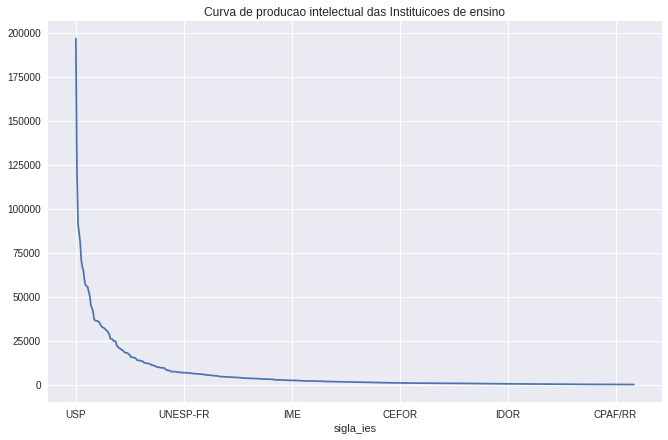

In [22]:
# Exibindo curva de produção intelectual por universidade
plt.rcParams['figure.figsize'] = (11,7)
Qt_total_producao.plot()
plt.title('Curva de producao intelectual das Instituicoes de ensino')

# Analise dos tipos de produções intelectuais, concetração do tipo de produção por instituição de ensino

In [23]:
# Apagando lixo de memoria com gc
gc.collect()

50

In [24]:
def Qtd_producao(names_col_princ, col_principal, col_dados_comparacao,df):

  new_df = None 

  # Obtendo numero de producoes
  for name in names_col_princ:

    # Capturando lista da quantidade de producao por tipo de cada instituicao
    df_num_prod = df[df[col_dados_comparacao].isin([name])].groupby(df[col_principal])[col_dados_comparacao].count()

    if (new_df is None):
      new_df = df_num_prod.copy()
    else:

      # Definindo novo data frame com a quatidade de produções por tipo de produção de cada universidade
      new_df = pd.merge(new_df, df_num_prod, how = 'inner', on = col_principal)
      
  return new_df

In [25]:
# Capturando quantidade de produção intelectual por tipo de produção
qt_producao_tipo = df.groupby(df["nome_tipo_producao"])['nome_tipo_producao'].count()
qt_producao_tipo

nome_tipo_producao
ARTSTICA          27404
BIBLIOGRFICA    1802769
TCNICA          1474944
Name: nome_tipo_producao, dtype: int64

In [26]:
# Obtendo nome dos tipos de producao
nome_tipo_prod = df['nome_tipo_producao'].unique()
nome_tipo_prod

array(['ARTSTICA', 'BIBLIOGRFICA', 'TCNICA'], dtype=object)

In [27]:
# Criando dataframe da quantidade de produção por tipo de cada instituição
for name in nome_tipo_prod:
  df_num_prod = df[df['nome_tipo_producao'].isin([name])].groupby(df['sigla_ies'])['nome_tipo_producao'].count()
df_num_prod

sigla_ies
ABRASCO       20
CBPF         256
CCD/SES      163
CDTN          84
CEETEPS      462
            ... 
UTFPR-MD      63
UTP         2692
UVA         2334
UVA-CE       685
UVV         1154
Name: nome_tipo_producao, Length: 503, dtype: int64

In [28]:
# Realizando merge das produções
df_tipo_prod_ies = Qtd_producao(nome_tipo_prod, 'sigla_ies','nome_tipo_producao', df )
df_tipo_prod_ies = pd.merge(df_tipo_prod_ies, Qt_total_producao, how = 'inner', on = 'sigla_ies')
nome_tipo_prod = np.append(nome_tipo_prod, ['PROD_TOTAL'])

In [29]:
# Definindo novo nome das colunas 
df_tipo_prod_ies = df_tipo_prod_ies.rename(columns = dict (zip (df_tipo_prod_ies.columns, nome_tipo_prod)))
df_tipo_prod_ies = df_tipo_prod_ies.sort_values(by='PROD_TOTAL', ascending=False)

In [30]:
# Exibindo dados referente a cada tipo de produção por insttituição de ensino
df_tipo_prod_ies.head()

,ARTSTICA,BIBLIOGRFICA,TCNICA,PROD_TOTAL
sigla_ies,,,,
USP,1686,96762,98143,196591
UFRJ,1894,60614,60075,122583
UNICAMP,2974,47433,40935,91342
UFMG,1395,48340,36237,85972
UFRGS,1618,47286,32214,81118


In [31]:
# Descrição das produções totais
df_tipo_prod_ies.describe()

,ARTSTICA,BIBLIOGRFICA,TCNICA,PROD_TOTAL
count,292.0000,292.0000,292.0000,292.0000
mean,93.8493,5805.3048,4710.9075,10610.0616
std,313.7759,10475.4626,9211.4059,19735.7344
min,1.0000,21.0000,6.0000,30.0000
25%,3.0000,617.0000,522.5000,1215.7500
50%,8.0000,1844.5000,1688.0000,3601.0000
75%,28.0000,5702.2500,4356.5000,10687.5000
max,2974.0000,96762.0000,98143.0000,196591.0000


Text(0.5, 1.0, 'Quantidade de Producao por Tipo de Producao das Instituicoes')

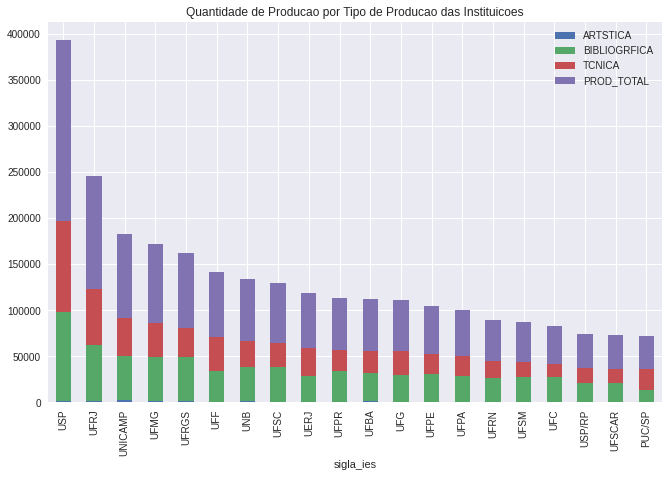

In [32]:
# Exibindo grafico
plt.rcParams['figure.figsize'] = (11,7)
df_tipo_prod_ies[0:20].plot(kind="bar",stacked=True)
plt.title('Quantidade de Producao por Tipo de Producao das Instituicoes')

# Analise percentual do tipo de Producao por Instituicao de Ensino

In [33]:
# Apagando lixo de memoria com gc
gc.collect()

64

In [34]:
# Deletando nome coluna PROD_TOTAL
nome_tipo_prod = np.delete(nome_tipo_prod, -1)

In [35]:
# Obtendo porcentagem da producoes
for name in nome_tipo_prod:
  df_tipo_prod_ies[name] = (df_tipo_prod_ies[name]*100)/df_tipo_prod_ies['PROD_TOTAL']
df_tipo_prod_ies['PROD_TOTAL'] = (df_tipo_prod_ies['PROD_TOTAL'] * 100)/(df_tipo_prod_ies['PROD_TOTAL'].sum())
df_tipo_prod_ies

,ARTSTICA,BIBLIOGRFICA,TCNICA,PROD_TOTAL
sigla_ies,,,,
USP,0.8576,49.2200,49.9224,6.3455
UFRJ,1.5451,49.4473,49.0076,3.9567
UNICAMP,3.2559,51.9290,44.8151,2.9483
UFMG,1.6226,56.2276,42.1498,2.7750
UFRGS,1.9946,58.2929,39.7125,2.6183
...,...,...,...,...
FACMAIS,1.6129,44.3548,54.0323,0.0040
INES,1.1494,27.5862,71.2644,0.0028
FBV,4.8780,43.9024,51.2195,0.0026


Text(0.5, 1.0, 'Porcentagem de Producao das 20 Maiores Produtoras')

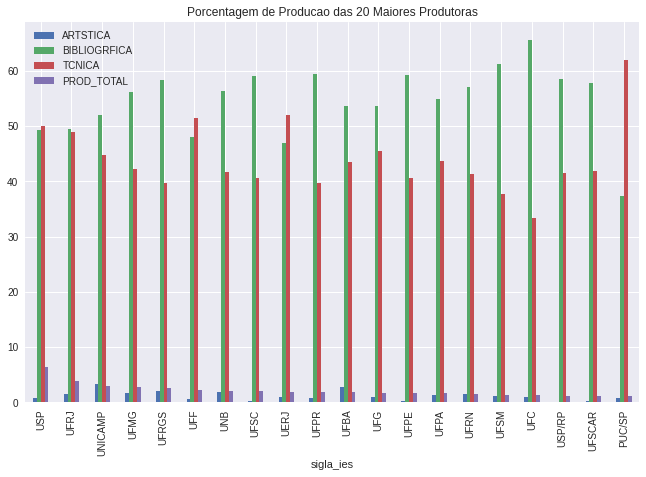

In [36]:
# Exibindo grafico percentual
plt.rcParams['figure.figsize'] = (11,7)
df_tipo_prod_ies[0:20].plot.bar()
plt.title('Porcentagem de Producao das 20 Maiores Produtoras')

# Tipo de produção por nome da área de concentracao

In [37]:
# Apagando lixo de memoria com gc
gc.collect()

71

In [38]:
# Quantidade total de producao por area de concentracao
Qt_total_producao = df.groupby("nome_area_concentracao")["id_producao_intelectual"].count()
Qt_total_producao = Qt_total_producao.sort_values(ascending=False)

In [39]:
# Obtendo frame de area de concentracao por tipo de producao
df_tipo_prod_area_conc = Qtd_producao(nome_tipo_prod, 'nome_area_concentracao', 'nome_tipo_producao',df )
df_tipo_prod_area_conc = pd.merge(df_tipo_prod_area_conc, Qt_total_producao, how = 'inner', on = "nome_area_concentracao")

In [40]:
# Definindo novo nome das colunas 
nome_tipo_prod = np.append(nome_tipo_prod, ['PROD_TOTAL'])
df_tipo_prod_area_conc = df_tipo_prod_area_conc.rename(columns = dict (zip (df_tipo_prod_area_conc.columns, nome_tipo_prod)))
df_tipo_prod_area_conc = df_tipo_prod_area_conc.sort_values(by='PROD_TOTAL', ascending=False)

In [41]:
# Exibindo dados referente a cada tipo de produção por area de concentracao
df_tipo_prod_area_conc.head()

,ARTSTICA,BIBLIOGRFICA,TCNICA,PROD_TOTAL
nome_area_concentracao,,,,
nan,1643,363478,417562,782683
EDUCAO,457,53379,46476,100312
FILOSOFIA,49,7799,13126,20974
ANTROPOLOGIA SOCIAL,411,6258,13517,20186
PRODUO VEGETAL,10,13676,3281,16967


In [42]:
# Removendo valores nulos
df_tipo_prod_area_conc = df_tipo_prod_area_conc.drop(["nan"])

In [43]:
# Realisando analise rapida
df_tipo_prod_area_conc.describe()

,ARTSTICA,BIBLIOGRFICA,TCNICA,PROD_TOTAL
count,1048.0000,1048.0000,1048.0000,1048.0000
mean,24.5687,652.9494,598.5658,1276.0840
std,121.8985,1983.5252,1737.4178,3658.1476
min,1.0000,1.0000,1.0000,5.0000
25%,1.0000,162.0000,111.0000,311.2500
50%,3.0000,304.5000,252.0000,586.0000
75%,9.0000,550.2500,595.2500,1210.0000
max,2187.0000,53379.0000,46476.0000,100312.0000


In [44]:
# Ordenando tabela por produção total
df_tipo_prod_area_conc = df_tipo_prod_area_conc.sort_values(by='PROD_TOTAL', ascending=False)

Text(0.5, 1.0, 'Quantidade de Producao por Nome de Concetração em Ascendencia')

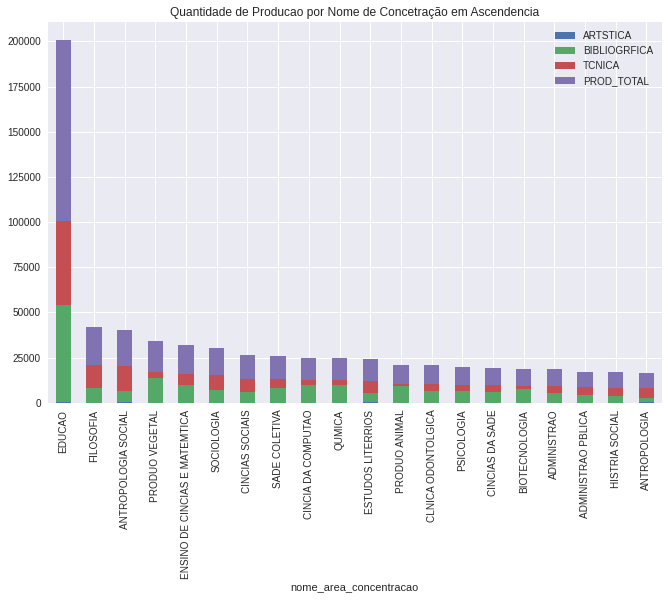

In [45]:
# Exibindo quantidade de producao por area de concentração
plt.rcParams['figure.figsize'] = (11,7)
df_tipo_prod_area_conc[0:20].plot(kind="bar",stacked=True)
plt.title('Quantidade de Producao por Nome de Concetração em Ascendencia')

# - Media de tempo de conclusão em relação ao tipo de produção 

In [46]:
def alter_col_data(name_col_dt, df, mes_tip1):

  datas = df[name_col_dt].unique()
  new_data = []

  # Altera o meses em numeros
  for data in datas:
    for mes in mes_tip1.keys():
      if mes in str(data):

        # Verifica se há algum elemento nulo
        if mes == 'nan':
          new_data.append(0)
          break

        # Separa a celula pela sting do mes
        data = data.split(mes)
        new_data.append(data[0]+'-'+mes_tip1[mes]+'-'+data[1])
        break
  
  data = []

  # realizando split de lixo
  for dt in new_data:
    data.append(str(dt).split(' '))
  new_data = data

  # Definindo dict da nova coluna
  new_col = dict (zip (datas, new_data))

  # Atualizando coluna
  for col in new_col.keys():
    df.loc[df[name_col_dt] == col, name_col_dt] = new_col[col][0]
  
  return df


In [47]:
# Definindo listas de meses 
mes_tip1 = {'nan':'0','JAN':'01', 'FEB':'02', 'MAR':'03', 'APR':'04', 'MAY':'05','JUL':'06','JUN':'07','AUG':'08','SEP':'09','OCT':'10','NOV':'11','DEC':'12',
'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 'May':'05','Jul':'06','Jun':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}

In [48]:
# Exibindo colunas 
df.columns

Index(['codigo_programa', 'nome_programa', 'sigla_ies', 'nome_ies', 'ano_base',
       'id_add_producao_intelectual', 'id_producao_intelectual', 'titulo_tese',
       'id_tipo_producao', 'nome_tipo_producao', 'id_subtipo_producao',
       'nome_subtipo_producao', 'id_formulario_producao', 'nome_formulario',
       'id_area_concentracao', 'nome_area_concentracao', 'id_linha_pesquisa',
       'linha_pesquisa', 'id_projeto', 'nome_projeto', 'dh_inicio_area_conc',
       'dh_fim_area_conc', 'dh_inicio_linha', 'dh_fim_linha',
       'indicador_glosa'],
      dtype='object')

In [49]:
# Obtendo datas das colunas
list_col_dt = ['dh_inicio_area_conc', 'dh_fim_area_conc', 'dh_inicio_linha', 'dh_fim_linha']

for col in list_col_dt:
  new_col = df[col].str.split(":", n = 1, expand = True)
  df[col] = new_col[0]


In [50]:
# Apagando lixo de memoria com gc
gc.collect()

61

In [51]:
# Alterando exibição da coluna de datas
for col in list_col_dt:
  df = alter_col_data(col, df, mes_tip1)


In [52]:
# Alterando o tipo das colunas de datas
for col in list_col_dt:
  df[col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='coerce')
df.head()

,codigo_programa,nome_programa,sigla_ies,nome_ies,ano_base,id_add_producao_intelectual,id_producao_intelectual,titulo_tese,id_tipo_producao,nome_tipo_producao,id_subtipo_producao,nome_subtipo_producao,id_formulario_producao,nome_formulario,id_area_concentracao,nome_area_concentracao,id_linha_pesquisa,linha_pesquisa,id_projeto,nome_projeto,dh_inicio_area_conc,dh_fim_area_conc,dh_inicio_linha,dh_fim_linha,indicador_glosa
0,32018010041P5,"INTERDISCIPLINAR EM ARTES, URBANIDADES E SUSTE...",UFSJ,UNIVERSIDADE FEDERAL DE SO JOO DEL-REI,2017,22828990,5722057,GAIA: VIVENCIAS ECOPOTICAS PARA UMA ODISSEIA N...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,85633,"POTICAS ARTSTICAS E SOCIOCULTURAIS: ESPAO, MEM...",110318,PROCESSOS CRIATIVOS,422474,LABORATRIO DE ECOPOTICAS - ECOLAB,2016-08-08,NaT,2016-08-09,NaT,0
1,41001010013P4,LITERATURA,UFSC,UNIVERSIDADE FEDERAL DE SANTA CATARINA,2017,23113447,6057073,CLARO!,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,81677,LITERATURAS,102394,"SUBJETIVIDADE, MEMRIA E HISTRIA",373117,"PASSAGENS: BENJAMIN, PARIS, BORGES, BUENOS AIRES",2013-01-01,NaT,2013-01-01,NaT,0
2,42046017010P3,ENSINO DE LNGUAS,UNIPAMPA,FUNDAO UNIVERSIDADE FEDERAL DO PAMPA,2017,23310429,5995810,DECLAMAO DE POESIA NO EVENTO III JORNADA DE RE...,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,82196,LINGUAGEM E DOCNCIA,103734,"INTERCULTURALIDADE, DISCURSO E COGNIO",324254,DESENHOS PEDAGGICOS NA FRONTEIRA BRASIL/URUGUAI,2014-01-06,NaT,2014-01-23,NaT,0
3,40006018035P3,ESTUDOS DE LINGUAGENS,UTFPR,UNIVERSIDADE TECNOLGICA FEDERAL DO PARAN,2017,22793294,5611563,TROIANAS XXI,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,83885,LINGUAGEM E TECNOLOGIA,106990,"ESTTICAS CONTEMPORNEAS, MODERNIDADE E TECNOLOGIA",369621,"OBSERVATRIO MIDITICO: ESTUDOS DE RECEPO, CIRCU...",2015-08-11,NaT,2015-08-18,NaT,0
4,22011013002P7,INTERDISCIPLINAR EM HUMANIDADES,UNILAB,UNIVERSIDADE DA INTEGRAO INTERNACIONAL DA LUSO...,2017,23347941,6225795,SANGUE DE PRETO E OUTRAS BATUCADAS,1,ARTSTICA,18,ARTES CNICAS,24,ARTISTICA - ARTES CNICAS,84853,ESTUDOS INTERDISCIPLINARES EM HUMANIDADES,108861,"TRABALHO, DESENVOLVIMENTO E MIGRACOES",0,nan,2016-02-15,NaT,2016-02-15,NaT,0


In [53]:
# Selecionando apenas datas não nulas
df_data_not_null = df.query('dh_fim_area_conc != "NaT" & dh_fim_linha != "NaT" & dh_inicio_area_conc != "NaT" & dh_inicio_linha != "NaT" ')

In [54]:
# Deletando nome coluna PROD_TOTAL
nome_tipo_prod = np.delete(nome_tipo_prod, -1)

In [66]:
# Exibindo media de periodo por tipo de produção
for name in nome_tipo_prod:

  # Selecionando tipo de producao
  df_tipo_pro = df_data_not_null.query('nome_tipo_producao == @name')

  # Media periodo de área de concentração
  print("Media periodo area de concentracao ", name,": ",(df_tipo_pro['dh_fim_area_conc'] - df_tipo_pro['dh_inicio_area_conc']).mean())

  # Media periodo liha de pesquisa
  print("Media periodo linha de pesquisa ", name,": ",(df_tipo_pro['dh_fim_linha'] - df_tipo_pro['dh_inicio_linha']).mean(),"\n")

Media periodo area de concentracao  ARTSTICA :  2901 days 23:06:40
Media periodo linha de pesquisa  ARTSTICA :  2519 days 05:56:55.384615392 

Media periodo area de concentracao  BIBLIOGRFICA :  2911 days 12:40:27.341190496
Media periodo linha de pesquisa  BIBLIOGRFICA :  2297 days 06:30:39.273998144 

Media periodo area de concentracao  TCNICA :  3211 days 09:30:55.010663712
Media periodo linha de pesquisa  TCNICA :  2617 days 18:24:38.891258240 

